In [24]:
%load_ext autoreload
%autoreload 2

from operaDB import OperaDB
from omronEyeLib import OmronEye
from imageLib import OperaImage
from sensorLib import *
import math
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

#Connection to opera DB
opera = OperaDB('opera_conn.xml', 'lifelog-shimizu')
#cur.execute("select version()")
#print(cur.fetchall())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
connect to opera server


In [25]:
#Get time from video
#desire_date = '2018-07-27'
#desire_date = '2018-08-22'
#desire_date = '2018-09-19'
desire_date = '2018-09-26'

#opera.get_TripListFromTime('2018-09-19', '00:00:00.0000', '23:59:59')
tripLists = opera.get_TripListFromTime(desire_date)
print(tripLists)

                                     id     start_time   length  \
0  6ddb9062-c12c-11e8-ad67-06dc25b93fb2  1537925720190     9973   
1  8b8e87ea-c12c-11e8-ad67-06dc25b93fb2  1537925770180     4822   
2  d70251de-c12c-11e8-ad67-06dc25b93fb2  1537925896758    35510   
3  0c661892-c12d-11e8-ad67-06dc25b93fb2  1537925986346  1588560   
4  de9157c8-c132-11e8-ad7b-06dc25b93fb2  1537928486195    29276   
5  340d32ee-c133-11e8-ad7c-06dc25b93fb2  1537928629543   514081   

                                user_id  
0  687b7332-3c82-11e8-91ea-06dc25b93fb2  
1  687b7332-3c82-11e8-91ea-06dc25b93fb2  
2  687b7332-3c82-11e8-91ea-06dc25b93fb2  
3  687b7332-3c82-11e8-91ea-06dc25b93fb2  
4  687b7332-3c82-11e8-91ea-06dc25b93fb2  
5  687b7332-3c82-11e8-91ea-06dc25b93fb2  


In [3]:
#OBD data
obd = OBD( opera )
column_names, df_obd = obd.get_DataFrameFromTrip( tripLists, 3, -20 )

['id', 'time', 'vehicle_speed', 'relative_accelerator_pedal_position', 'user_id']


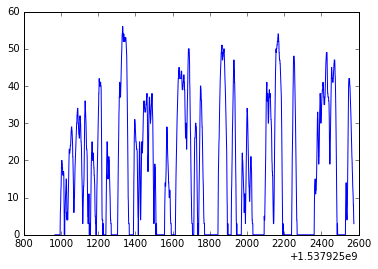

In [4]:
import matplotlib.pyplot as plt
print(column_names)
plt.plot(df_obd['time']/1000,df_obd['vehicle_speed'])
plt.show()

In [30]:
#Sensor data
sensor = Sensors( opera )
sensor.get_ListSensorType()

sensor name : sensor type
BMP280 temperature : 65536
BMI160 accelerometer : 1
BMM150 magnetometer : 2
Orientation : 3
BMI160 gyroscope : 4
TMD27723 Light Sensor : 5
BMP280 pressure : 6
Gravity : 9
Linear Acceleration : 10
Rotation Vector : 11
BMM150 magnetometer (uncalibrated) : 14
Game Rotation Vector : 15
BMI160 gyroscope (uncalibrated) : 16
Geomagnetic Rotation Vector : 20
BMI160 accelerometer (uncalibrated) : 35
You need more information, Please see below
https://developer.android.com/reference/android/hardware/Sensor


In [59]:
column_names, df_sensor = sensor.get_DataFrameFromTripWithSensorType( 30, tripLists, 0, -20 )
print(df_sensor)

Empty DataFrame
Columns: [id, time, sensor_type, sensor_name, accuracy, sensor_values, model, timestamp, user_id]
Index: []


In [56]:
print(column_names)
print(df_sensor['sensor_values'][0])
s = df_sensor['sensor_values'][0]
l = [x.strip() for x in s.split(',')]
print(len(l))
print(float(l[0]))

['id', 'time', 'sensor_type', 'sensor_name', 'accuracy', 'sensor_values', 'model', 'timestamp', 'user_id']
9.613608,0.09580079,-0.1341211
3
9.613608


In [ ]:
column_names, df_sensor = sensor.get_DataFrameFromTrip( tripLists, 0, -20 )
print(column_names)
print(df_sensor['sensor_type'][:20])
print(df_sensor['sensor_name'][:20])